In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
insurance_data = pd.read_csv(r"C:\Users\Mohith Kumar\Desktop\Git Hub Projects\ML Projects\Car Insurance Modelling using Python\insurance_claims.csv")
print(insurance_data.head())

   age_of_driver  car_age    region  number_of_claims
0             30        7     Urban                 0
1             33       10     Rural                 2
2             39       11  Suburban                 1
3             18       12     Urban                 0
4             21        8     Urban                 0


# age_of_driver: The age of the driver.
# car_age: The age of the car.
# region: The region where the driver is located (Urban, Rural, Suburban).
# number_of_claims: The number of claims made.

In [34]:
# Summary statistics of the dataset
summary_stats = insurance_data.describe(include='all')

# Checking for missing values
missing_values = insurance_data.isnull().sum()

print(summary_stats)

        age_of_driver      car_age region  number_of_claims
count     1000.000000  1000.000000   1000       1000.000000
unique            NaN          NaN      3               NaN
top               NaN          NaN  Rural               NaN
freq              NaN          NaN    343               NaN
mean        33.112000     6.673000    NaN          0.675000
std          9.253598     4.377583    NaN          0.822223
min         18.000000     0.000000    NaN          0.000000
25%         25.000000     3.000000    NaN          0.000000
50%         33.000000     6.000000    NaN          0.000000
75%         41.000000    11.000000    NaN          1.000000
max         49.000000    14.000000    NaN          5.000000


In [36]:
insurance_data.isnull().sum()

age_of_driver       0
car_age             0
region              0
number_of_claims    0
dtype: int64

In [38]:
insurance_data.duplicated().sum()

138

In [40]:
insurance_data.drop_duplicates(inplace=True)

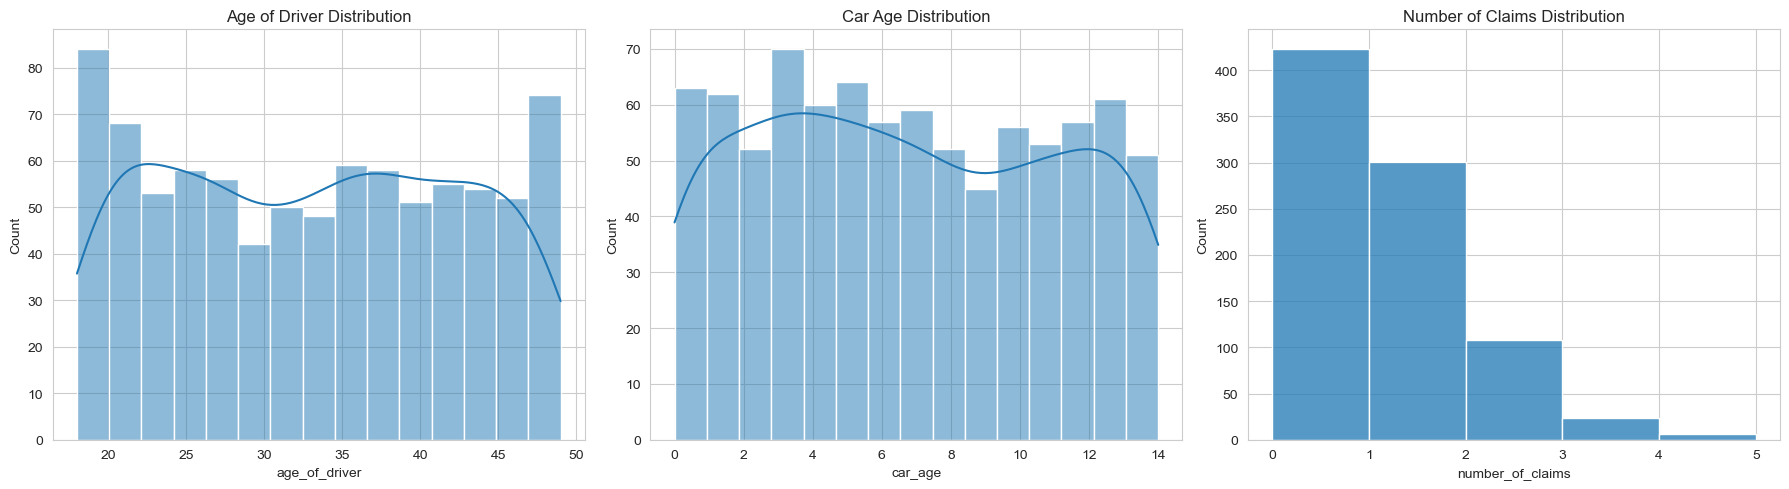

In [42]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting distributions of numerical variables
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(insurance_data['age_of_driver'], kde=True, bins=15, ax=ax[0])
ax[0].set_title('Age of Driver Distribution')

sns.histplot(insurance_data['car_age'], kde=True, bins=15, ax=ax[1])
ax[1].set_title('Car Age Distribution')

sns.histplot(insurance_data['number_of_claims'], kde=False, bins=range(6), ax=ax[2])
ax[2].set_title('Number of Claims Distribution')

plt.tight_layout()
plt.show()

In [43]:
# Observations:
# Age of Driver: Appears approximately normally distributed around the 30s.
# Car Age: Also seems fairly normally distributed with a slight right skew.
# Number of Claims: Most drivers have 0 claims, indicating a right-skewed distribution which is common in count data like insurance claims.

# Data Preprocessing

In [45]:
from sklearn.model_selection import train_test_split
# One-Hot Encoding for 'region' variable
insurance_data_encoded = pd.get_dummies(insurance_data, columns=['region'], drop_first=True)
# Splitting the data into training and testing sets
train, test = train_test_split(insurance_data_encoded, test_size=0.2, random_state=42)
print(train.head())

     age_of_driver  car_age  number_of_claims  region_Suburban  region_Urban
199             42       14                 1            False         False
158             20       14                 2            False          True
337             19        6                 2            False          True
102             38        6                 1            False          True
391             33        9                 0             True         False


# Car Insurance Modelling for Event Frequency

In [62]:
# Step 1: Separate predictors and target
X_train = train.drop('number_of_claims', axis=1)
y_train = train['number_of_claims']

In [64]:
X_train.shape

(689, 4)

In [66]:
y_train.shape

(689,)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [74]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [76]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr

LinearRegression()

In [78]:
lr.fit(X_train, y_train)

LinearRegression()

In [80]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error, r2_score

print("MSE:", mean_squared_error(y_train, y_pred_train))
print("R² Score:", r2_score(y_train, y_pred_train))

MSE: 0.660336777130411
R² Score: 0.03468328563106138


In [84]:
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("R² Score:", r2_score(y_test, y_pred_test))

MSE: 0.7545079684216368
R² Score: 0.02683035891488994


In [86]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
y_pred_train_model = model.predict(X_train)
y_pred_test_model = model.predict(X_test)

In [90]:
print("MSE:", mean_squared_error(y_train, y_pred_train_model))
print("R² Score:", r2_score(y_train, y_pred_train_model))

MSE: 0.19030691905241462
R² Score: 0.7217988514592881


In [92]:
print("MSE:", mean_squared_error(y_test, y_pred_test_model))
print("R² Score:", r2_score(y_test, y_pred_test_model))

MSE: 1.1678658213332904
R² Score: -0.5063214833370255


In [93]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [94]:
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [95]:
print("MSE:", mean_squared_error(y_train, y_pred_train_ridge))
print("R² Score:", r2_score(y_train, y_pred_train_ridge))

MSE: 0.6603369071557108
R² Score: 0.03468309555290794


In [96]:
print("MSE:", mean_squared_error(y_test, y_pred_test_ridge))
print("R² Score:", r2_score(y_test, y_pred_test_ridge))

MSE: 0.7544635647914565
R² Score: 0.02688763102685432


In [97]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_train, y_train, scoring='r2', cv=5)
print("CV R² Scores:", scores)
print("Mean CV R²:", scores.mean())

CV R² Scores: [ 0.03646447 -0.00638195  0.03180645  0.03628257 -0.02879122]
Mean CV R²: 0.013876062538360956
